In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import os

In [77]:
def kmeans(imgPath,k):
    img = cv2.imread(imgPath,1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pixels = img.reshape((-1,3))
    pixels = np.float32(pixels)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10,0.85)
    s,labels,centroids = cv2.kmeans(pixels,k,None,criteria,3,cv2.KMEANS_RANDOM_CENTERS)
    centroids = np.uint8(centroids)
    segmentedData = centroids[labels.flatten()]
    segmentedImage = segmentedData.reshape((img.shape))
    return segmentedImage,segmentedData,labels.flatten(),centroids



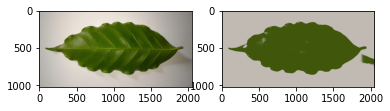

In [100]:
imgPath = 'drive/MyDrive/train/3.jpg'
img = cv2.imread(imgPath)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
k = 2
segmentedImage,segmentedData,labels,centroids = kmeans(imgPath,k)
plt.subplot(1,2,2)
plt.imshow(segmentedImage)
plt.subplot(1,2,1)
plt.imshow(img)

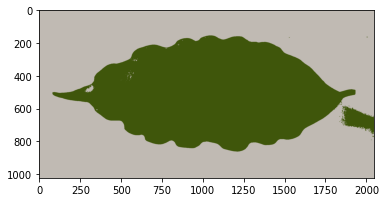

In [101]:
kernel = np.ones((3,3))
eroded = cv2.erode(segmentedImage,kernel=kernel,iterations=1)
plt.imshow(eroded)

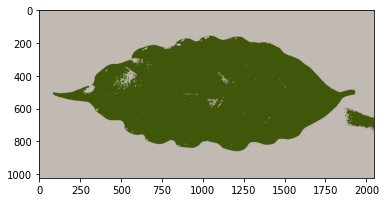

In [102]:
dilated = cv2.dilate(segmentedImage,kernel=kernel,iterations=1)
plt.imshow(dilated)

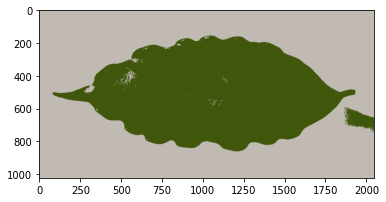

In [11]:
dilatedEroded = cv2.erode(dilated,kernel=kernel,iterations=1)
plt.imshow(dilatedEroded)

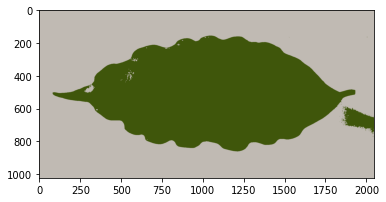

In [12]:
erodedDilated = cv2.dilate(eroded,kernel=kernel,iterations=1)
plt.imshow(erodedDilated,)

In [97]:
def dice_score(image_1,image_2):
  mask1=(image_1==255)
  mask2=(image_2==255)
  intersect = np.sum(mask1*mask2)
  fsum = np.sum(mask1)
  ssum = np.sum(mask2)
  dice = (2 * intersect ) / (fsum + ssum)
  return dice

In [15]:
mask = cv2.imread("drive/MyDrive/masks/3_mask.png",0)
for i in range(len(mask)):
    for j in range(len(mask[i])):
        if mask[i][j] != 0:
            mask[i][j] = 255
diceScoreData = []
for i in range(len(segmentedData)):
    temp = 255 if segmentedData[i][1] < 127 else 0
    diceScoreData.append(temp)
diceScoreData = np.array(diceScoreData)


(1024, 2048) (1024, 2048) ^^^^^^^
the dice score is : 0.9845166201343368


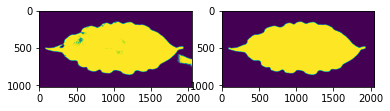

In [16]:
s = diceScoreData.reshape((mask.shape))
plt.subplot(1,2,1)
plt.imshow(s)
plt.subplot(1,2,2)
plt.imshow(mask)
print("the dice score is :",dice_score(mask,s))

In [98]:
def diceScores(imgsPath,masksPath,k):
    totalScore = 0
    count = 0
    for root,dirs,files in os.walk('drive/MyDrive/train'):
        for file in files:
            count+=1
            imgPath = os.path.join(root,file)
            segmentedImage,segmentedData,labels,centroids = kmeans(imgPath,k)
            maskPath = os.path.join(masksPath,file.split(".")[0]+"_mask.png")

            mask = cv2.imread(maskPath,0)
            mask = (mask!=0)
            mask = mask*255
            if sum(centroids[1])>sum(centroids[0]):
                diceScoreData = (labels==0)
            else:
                diceScoreData = (labels==1)
            diceScoreData = diceScoreData*255
            diceScoreData = np.array(diceScoreData)


            s = diceScoreData.reshape((mask.shape))
            score = dice_score(mask,s)
            totalScore+=score
            print("dice score for",file,score,count,"th image")
    print("average dice score:",totalScore/count)

In [99]:
imgsPath = "drive/MyDrive/train"
masksPath = "drive/MyDrive/masks"
k = 2
diceScores(imgsPath,masksPath,k)

dice score for 1027.jpg 0.992012029923095 1 th image
dice score for 101.jpg 0.9156684174884298 2 th image
dice score for 1029.jpg 0.9831618528548818 3 th image
dice score for 1007.jpg 0.9816350966551826 4 th image
dice score for 1019.jpg 0.9877594966424474 5 th image
dice score for 1001.jpg 0.966127980191957 6 th image
dice score for 1023.jpg 0.9938151366485776 7 th image
dice score for 1030.jpg 0.9773568773590329 8 th image
dice score for 1021.jpg 0.9201739900614258 9 th image
dice score for 1018.jpg 0.9761718574325426 10 th image
dice score for 1010.jpg 0.9951477160601312 11 th image
dice score for 1006.jpg 0.9813603708319912 12 th image
dice score for 1028.jpg 0.9867417282565106 13 th image
dice score for 1002.jpg 0.9705185743736239 14 th image
dice score for 1099.jpg 0.8599380100861299 15 th image
dice score for 1491.jpg 0.9937021233652169 16 th image
dice score for 1604.jpg 0.9833066339992461 17 th image
dice score for 1590.jpg 0.9646148297648122 18 th image
dice score for 1740.jp